# Disaster Tweets classification using Bidirectional LSTM

### Data Acquisition

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets.csv')

In [ ]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df['text'][2100]

'Once the fires are out, water will emerge as the next mismanaged catastrophe. Catchment stream flows central north we…'

In [ ]:
df['target'][2100]

np.int64(0)

In [ ]:
df.shape

(11370, 5)

In [ ]:
df.isnull().sum()

,0
id,0
keyword,0
location,3418
text,0
target,0


In [ ]:
df = df.drop(['id', 'location'], axis=1)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.shape

(11370, 4)

In [ ]:
df.head()

,index,keyword,text,target
0,0,ablaze,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    11370 non-null  int64 
 1   keyword  11370 non-null  object
 2   text     11370 non-null  object
 3   target   11370 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 355.4+ KB


In [ ]:
## Separate Independent Variable
X = df.drop('target', axis=1)

In [ ]:
## separate dependent variable
y = df['target']

In [ ]:
y.value_counts()

,count
target,
0,9256
1,2114


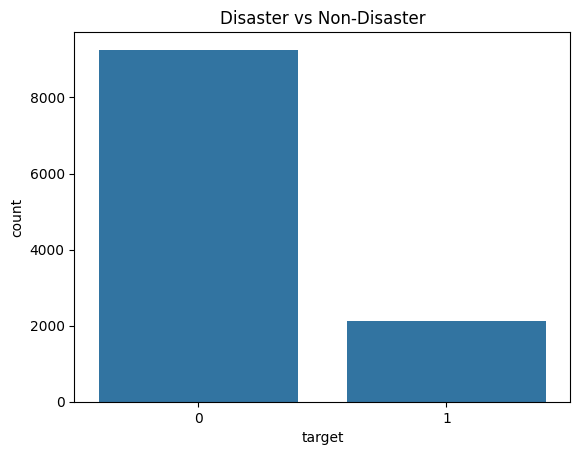

In [ ]:
sns.countplot(x='target', data=df)
plt.title("Disaster vs Non-Disaster")
plt.show()

Here We can see that these datas are highly imbalanced.

## Data Preprocessing

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, Bidirectional, LSTM, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [ ]:
## Vocabulary Size
voc_size = 5000

In [ ]:
messages = X.copy()

In [ ]:
messages.head(10)

,index,keyword,text
0,0,ablaze,"Communal violence in Bhainsa, Telangana. ""Ston..."
1,1,ablaze,Telangana: Section 144 has been imposed in Bha...
2,2,ablaze,Arsonist sets cars ablaze at dealership https:...
3,3,ablaze,Arsonist sets cars ablaze at dealership https:...
4,4,ablaze,"""Lord Jesus, your love brings freedom and pard..."
5,5,ablaze,"If this child was Chinese, this tweet would ha..."
6,6,ablaze,Several houses have been set ablaze in Ngemsib...
7,7,ablaze,Asansol: A BJP office in Salanpur village was ...
8,8,ablaze,"National Security Minister, Kan Dapaah's side ..."
9,9,ablaze,This creature who’s soul is no longer clarent ...


In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
## Main Logic of Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

corpus=[]
for i in range(0, len(messages)):
  review = re.sub('[^a-zA-Z0-9]', ' ', messages['text'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus

['commun violenc bhainsa telangana stone pelt muslim hous hous vehicl set ablaz',
 'telangana section 144 impos bhainsa januari 13 15 clash erupt two group januari 12 po',
 'arsonist set car ablaz dealership http co goqvyjbpvi',
 'arsonist set car ablaz dealership http co 0gl7nucplb http co u1ccbhowh9',
 'lord jesu love bring freedom pardon fill holi spirit set heart ablaz l http co vltznnpni8',
 'child chines tweet would gone viral social media would ablaz snl would made racist j',
 'sever hous set ablaz ngemsibaa villag oku sub divis north west region cameroon http co 99uhgazxy2',
 'asansol bjp offic salanpur villag set ablaz last night bjp alleg tmc behind incid polic b',
 'nation secur minist kan dapaah side chic set internet ablaz latest power video http co rhzomqvslj',
 'creatur soul longer clarent blue ablaz thing carri memori memori http co tbksndrdox',
 'imag show havoc caus cameroon militari torch hous oku shameless militari report',
 'social media went banana chuba hubbard a

In [ ]:
onehot_rep = [one_hot(words, voc_size) for words in corpus]
print(onehot_rep)

[[1378, 557, 4578, 1739, 455, 217, 1844, 4511, 4511, 1377, 4953, 4195], [1739, 1336, 2882, 2832, 4578, 3584, 4209, 278, 422, 3995, 4366, 1462, 3584, 4061, 4139], [2164, 4953, 1108, 4195, 4790, 2111, 4884, 1338], [2164, 4953, 1108, 4195, 4790, 2111, 4884, 8, 2111, 4884, 2086], [2856, 3585, 2754, 4353, 2543, 4714, 2530, 4155, 2863, 4953, 3976, 4195, 1004, 2111, 4884, 2190], [725, 1402, 1951, 3064, 1656, 4649, 1105, 2530, 3064, 4195, 2572, 3064, 4384, 2025, 1608], [4154, 4511, 4953, 4195, 4246, 660, 2960, 2526, 3271, 738, 2144, 4337, 4813, 2111, 4884, 2468], [2230, 825, 2409, 2515, 660, 4953, 4195, 4358, 337, 825, 3187, 3641, 2794, 1341, 2957, 702], [4530, 3560, 2985, 4182, 4636, 4434, 3099, 4953, 613, 4195, 3651, 1679, 351, 2111, 4884, 377], [4620, 3720, 746, 1167, 1558, 4195, 689, 1223, 2910, 2910, 2111, 4884, 1739], [512, 2946, 1150, 908, 4813, 4075, 658, 4511, 2960, 1401, 4075, 2738], [1105, 2530, 3981, 3789, 4924, 3147, 4537, 4463, 2102, 298, 593, 4624, 2111, 4884, 221], [1694, 1978,

In [ ]:
corpus[0]

'commun violenc bhainsa telangana stone pelt muslim hous hous vehicl set ablaz'

In [ ]:
onehot_rep[0]

[1378, 557, 4578, 1739, 455, 217, 1844, 4511, 4511, 1377, 4953, 4195]

### Embeddeding Representation

In [ ]:
sent_length = 20
embedded_docs = pad_sequences(onehot_rep, padding='post', maxlen = sent_length)
print(embedded_docs)

[[1378  557 4578 ...    0    0    0]
 [1739 1336 2882 ...    0    0    0]
 [2164 4953 1108 ...    0    0    0]
 ...
 [3475 1273  958 ...    0    0    0]
 [ 741 1326 3400 ...    0    0    0]
 [ 388 1619 3927 ...    0    0    0]]


In [ ]:
embedded_docs[0]

array([1378,  557, 4578, 1739,  455,  217, 1844, 4511, 4511, 1377, 4953,
       4195,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
corpus[5]

'child chines tweet would gone viral social media would ablaz snl would made racist j'

In [ ]:
embedded_docs[5]

array([ 725, 1402, 1951, 3064, 1656, 4649, 1105, 2530, 3064, 4195, 2572,
       3064, 4384, 2025, 1608,    0,    0,    0,    0,    0], dtype=int32)

### Model Building

In [ ]:
embedding_vector_features = 40

In [ ]:
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features))
model.build(input_shape=(None, sent_length))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.001)))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 20, 40)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 40)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200)            │       112,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,801 (1.20 MB)

 Trainable params: 313,401 (1.20 MB)

 Non-trainable params: 400 (1.56 KB)

In [ ]:
len(embedded_docs), y.shape

(11370, (11370,))

In [ ]:
X_final = np.array(embedded_docs).astype('int')
y_final = np.array(y).astype('int')

In [ ]:
X_final.shape, y_final.shape

((11370, 20), (11370,))

### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, mode='min', verbose=1)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: weights[i] for i in range(len(weights))}
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(0.6164272160477094), 1: np.float64(2.647264260768335)}


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, class_weight=class_weights, callbacks=[early_stop])

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.6080 - loss: 0.6229 - val_accuracy: 0.8259 - val_loss: 0.5135
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.8307 - loss: 0.3572 - val_accuracy: 0.8285 - val_loss: 0.4081
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.8857 - loss: 0.2602 - val_accuracy: 0.8333 - val_loss: 0.3549
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.9249 - loss: 0.1960 - val_accuracy: 0.8848 - val_loss: 0.2961
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9299 - loss: 0.1680 - val_accuracy: 0.8646 - val_loss: 0.3698
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9440 - loss: 0.1358 - val_accuracy: 0.8659 - val_loss: 0.4007
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.9580 - loss: 0.1171 - val_accuracy: 0.8030 - val_loss: 0.5975
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


In [ ]:
model.save("disaster_model.keras")

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

y_pred_prob = model.predict(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_prob)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]

print("Best threshold based on F1:", best_threshold)

285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Best threshold based on F1: 0.36509177


In [ ]:
y_pred = (model.predict(X_test) > 0.31).astype(int)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


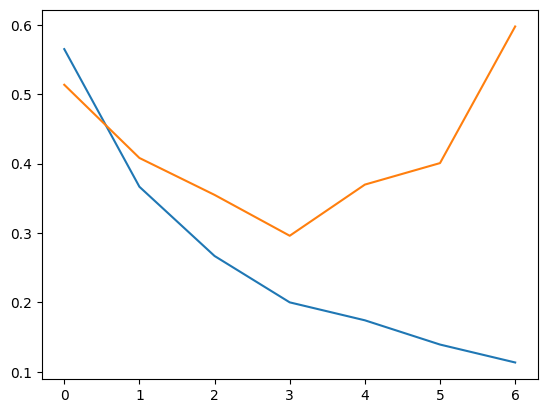

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

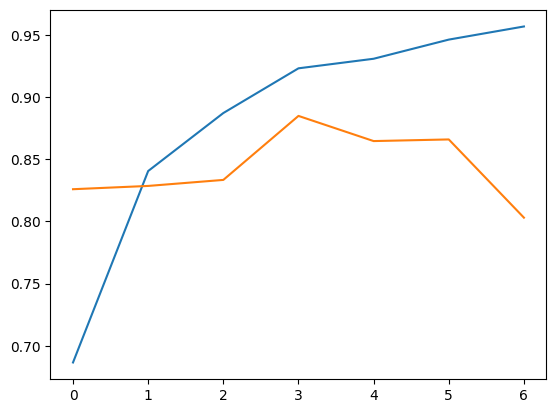

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
accuracy_score(y_test, y_pred)

0.8689533861037819

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1708,  170],
       [ 128,  268]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1878
           1       0.61      0.68      0.64       396

    accuracy                           0.87      2274
   macro avg       0.77      0.79      0.78      2274
weighted avg       0.87      0.87      0.87      2274



In [ ]:
from tensorflow.keras.models import load_model
from nltk.stem.porter import PorterStemmer

# Ensure these are consistent with your training setup
vocab_size = 5000
sent_length = 20
model_path = '/content/disaster_model.keras'  # Save your trained model as this

# Load the trained model
model = load_model(model_path)

# Initialize stemmer
ps = PorterStemmer()

# Predict Function
def predict_disaster_tweet(tweet: str):
    review = re.sub('[^a-zA-Z0-9]', ' ', tweet)
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)

    encoded = one_hot(review, vocab_size)
    padded = pad_sequences([encoded], maxlen=sent_length, padding='post')

    #Predict
    prediction = model.predict(padded)[0][0]
    label = "🚨 Disaster Tweet" if prediction >= 0.31 else "✅ Not a Disaster Tweet"

    return label, prediction

example_tweet = "Massive earthquake just shook the entire city. Buildings are down!"
result, score = predict_disaster_tweet(example_tweet)
print(f"{result} (Confidence: {score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
🚨 Disaster Tweet (Confidence: 0.51)
